In [ ]:
!pip3 install beautifulsoup4
!pip3 install requests
!pip3 install pandas
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu
!pip3 install inltk
!pip3 install bnlp_toolkit
!pip3 install wordcloud
!pip3 install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

!git clone https://github.com/Foysal87/bn_nlp
!git clone https://github.com/banglakit/lemmatizer
!git clone https://github.com/sagorbrur/bnlp/blob/master/model/bn_pos.pkl

In [ ]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from pprint import pprint
import bn_nlp

In [ ]:
from inltk.inltk import setup

setup('bn') 

#Bengali Corpus Generator

In [ ]:
beng_url = 'https://www.sangbadpratidin.in/world/sniffer-dog-receives-award-from-zelenskyy-on-diffusing-200-bombs/' 

In [ ]:
from bn_nlp.tokenizer import sentenceTokenizer
senttoken=sentenceTokenizer()

In [ ]:
from queue import Queue
from re import sub, split, M

q = Queue(maxsize = 0)

q.put(beng_url)

nsent = 0
bengcorpus = ""
visited = []
limit = 10000

while nsent <= limit: 
  length = q.qsize()
  if length > 0:

    url = q.get()
    if url not in visited:

      req = requests.get(url)
      content = req.content
      soup = BeautifulSoup(content, 'html5lib')

      for data_corpus in soup.find_all("div", class_="sp-single-post"):
        data = data_corpus.findChildren("p") #change this according to the corpus that i end up choosing 
        for i in data:
          next_p = i.get_text()
          sent = senttoken.basic_tokenizer(next_p) #tokenizing into sentences as well 
          if nsent <= limit:
            for j in sent:
              if 'Highlights' not in j:
                j = sub(r'[a-zA-Z0-9\тАФ\@\(\)\-\тАЩ]', '', j)  #removing english things
                j = sub(r'^[\s\,\.\#\/\'\"\тАЩ\:\\\/\"\_]*$', '', j, flags=M) #removing sentences which have just random punctuation and whitespace
                if len(j) == 0: 
                  continue
                bengcorpus = bengcorpus + "\n" + j
                nsent = nsent + 1

      if nsent <= limit:
        data_corpus = soup.find_all('a') #add a condition so that only good links are appended so that it's cute to analyze the data later 
        for i in data_corpus:
          link = i.get('href')
          if link is not None:
            if 'https://www.sangbadpratidin.in/' in link: #ensuring that i keep getting links of the same kind cause otherwise my logic will just fail
                q.put(link)

      visited.append(url)

print(bengcorpus)


рж╕ржВржмрж╛ржж ржкрзНрж░рждрж┐ржжрж┐ржи ржбрж┐ржЬрж┐ржЯрж╛рж▓ ржбрзЗрж╕рзНржХ: рж░рж╛рж╢рж┐рзЯрж╛рж░ ржмрж┐рж░рзБржжрзНржзрзЗ ржжрж╛ржБрждрзЗ ржжрж╛ржБржд ржЪрзЗржкрзЗ рж▓рзЬрж╛ржЗ ржЪрж╛рж▓рж╛ржЪрзНржЫрзЗржи ржЗржЙржХрзНрж░рзЗржирзАрзЯрж░рж╛  
 рждржмрзЗ рж╢рзБржзрзБ ржорж╛ржирзБрж╖ ржирзЯ, ржжрзЗрж╢рж░ржХрзНрж╖рж╛рж░ ржХрж╛ржЬрзЗ ржЕржмржжрж╛ржи рж░рзЗржЦрзЗржЫрзЗ ржПржХржЯрж┐ ржХрзБржХрзБрж░ржУ
 рждрж╛рж░ ржХрж╛ржЬрзЗрж░ ржкрзБрж░рж╕рзНржХрж╛рж░ рж╣рж┐рж╕рж╛ржмрзЗ ржжрзЗрж╢рзЗрж░ ржкрзНрж░рзЗрж╕рж┐ржбрзЗржирзНржЯ ржнрж▓рзЛржжрж┐ржорж┐рж░ ржЬрзЗрж▓рзЗржирж╕рзНржХрж┐рж░   рж╣рж╛ржд ржерзЗржХрзЗ ржкрзБрж░рж╕рзНржХрж╛рж░ ржкрзЗрзЯрзЗржЫрзЗ рж╕рзЗ
 ржЖрзЬрж╛ржЗ ржмржЫрж░ ржмрзЯрж╕рж┐ ржПржЗ ржХрзБржХрзБрж░ржЯрж┐рж░ ржирж╛ржо ржкрзНржпрж╛ржЯрзНрж░ржи
ржЬрж╛ржирж╛ ржЧрж┐рзЯрзЗржЫрзЗ, рж░рж╛рж╢рж┐рзЯрж╛ рж╣рж╛ржорж▓рж╛ ржЪрж╛рж▓рж╛ржирзЛрж░ ржкрж░ ржерзЗржХрзЗ ржкрзНрж░рж╛рзЯ рзирзжрзжржЯрж┐ ржмрж┐рж╕рзНржлрзЛрж░ржХ ржЙржжрзНржзрж╛рж░ ржХрж░рзЗржЫрзЗ ржкрзНржпрж╛ржЯрзНрж░ржи
 рж░рж╛рж╢рж┐

In [ ]:
#writing the corpus to a text file 
with open('/content/bengaliCorpus.txt', 'w') as writefile:
    writefile.write(bengcorpus)

#Cleaning the Bengali Corpus

In [ ]:
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#got this from stackoverflow after i realized that my bengali corpus had quite a few emojis as well

In [ ]:
from re import sub, split, M

#reading the text
with open('/content/bengaliCorpus.txt', 'r') as f:
    lines = f.readlines()

#removing all punctuation from the corpus - i don't think i need to do any more cleaning 
cleancorp = ""
linesdone = 0

for line in lines:
  if linesdone <= 10500:
    line = sub(r'[\.\,\(\)\-\тАФ\тАЭ\тАЬ\:\?\n\тАж\ред\тАШ\_\тАУ\#\┬┐\?\┬б\├н\!\\\/\├б\[\]\;\&\├│\тАШ\|\тд╡я╕П\ЁЯдй\%\тЭд\тЩе]', ' ', line) #not removing the ' cause it might cause problems later during tokenization
    line = sub(r'^[\s]*$', '', line, flags=M)
    line = deEmojify(line)
    if len(line) == 0:
      continue
    print(line)
    if len(cleancorp) > 0:
      cleancorp = cleancorp +  "\n" + line
    else:
      cleancorp = line
    linesdone = linesdone + 1
  else:
    break

#put the obtained output in another text file 
with open('/content/bengaliCleanCorpus.txt', 'w') as writefile:
    writefile.write(cleancorp)

Streaming output truncated to the last 5000 lines.
 ржХрзЗржиржирж╛ ржкрзБрж░рзБрж╖рзНржЯ рж╢рж╕рзНржп ржПрж╕рзЗржЗ рждрзЛ ржкрзБрж╖рзНржЯрж┐ ржжрзЗржмрзЗ рж╕ржнрзНржпрждрж╛ржХрзЗ 
 ржкрзГржерж┐ржмрзА рждрж╛ржЗ ржПржЗ ржирж┐рзЯржорзЗржЗ ржШрзБрж░рж┐рзЯрзЗ ржЪрж▓рзЗржЫрзЗ рж╕ржорзЯрзЗрж░ ржХрж╛ржБржЯрж╛ 
 ржХрж┐ржирзНрждрзБ ржПржЗ ржпрзЗ ржЖржорж░рж╛ ржЪрж╛ржорзЬрж╛рж░ ржирж┐ржЪрзЗ ржврзБржХрж┐рзЯрзЗ ржжрж┐рзЯрзЗржЫрж┐ ржЙржжрж╛рж╕рзАржирждрж╛  ржПржЗ ржпрзЗ ржЖржорж░рж╛ ржирж┐рж░рзНрж▓ржЬрзНржЬржнрж╛ржмрзЗ ржЕрждрзАрждржмрж┐ржЪрзНржЫрж┐ржирзНржи ржУ ржЖрждрзНржоржЧрзЛржкржиржХрж╛рж░рзА  ржП ржкрзНрж░ржмржгрждрж╛ржЗ рж╢ржЩрзНржХрж╛рж░ 
 ржЦрзЗрзЯрж╛рж▓ ржХрж░рж▓рзЗ ржжрзЗржЦржм  ржУржЗ ржЪрзНржпрж╛ржЯрзЗ ржнрзБрзЯрзЛ ржирж╛ржорзЗ ржЕрж╕рзНрждрж┐рждрзНржмрж╢рзАрж▓ рж╣ржУрзЯрж╛рж░ ржорждрзЛржЗ ржШрзБрж░ржм ржмрзЗрзЬрж╛ржЪрзНржЫрзЗ ржЖржорж╛ржжрзЗрж░ ржорж┐ржЫрзЗ рж╕рждрзНрждрж╛ 
 ржЖрж░ ржХрждржжрж┐ржи ржХрж╛ржЙржХрзЗ ржЪрж┐ржарж┐ рж▓рж┐ржЦржЫрж┐ ржирж╛ ржЖржорж░рж╛┬а ржХрждржжрж┐ржи ржЖр

#Word Tokenization

In [ ]:
from bn_nlp.tokenizer import wordTokenizer
wordtoken=wordTokenizer()

with open('/content/bengaliCleanCorpus.txt', 'r') as f:
    lines = f.readlines()

wordlistbeng = []
linenum = 0

for line in lines:
  linenum += 1
  print(linenum)
  tokens = wordtoken.basic_tokenizer(line)
  for word in tokens:
    wordlistbeng.append(word)

### Finding word frequency

In [ ]:
from collections import Counter

wordcountbeng = Counter(wordlistbeng)
print(wordcountbeng.most_common(30))

[('ржПржЗ', 998), ('ржХрж░рзЗ', 882), ('ржирж╛', 864), ('ржерзЗржХрзЗ', 777), ('ржУ', 539), ('рж╣рзЯ', 536), ('рж╣рзЯрзЗржЫрзЗ', 533), ('ржХрж░рж╛', 511), ('рж╣ржмрзЗ', 465), ('рж╕рзЗржЗ', 401), ('ржХрж┐ржирзНрждрзБ', 396), ('ржирж┐рзЯрзЗ', 393), ('рж╕ржЩрзНржЧрзЗ', 379), ('ржЖрж░', 351), ('ржЬржирзНржп', 345), ('ржХрж░рждрзЗ', 336), ('рждрж┐ржирж┐', 330), ('рждрж╛', 325), ('ржпрзЗ', 323), ('рждржмрзЗ', 315), ('ржПржмржВ', 314), ('рж╣рзЯрзЗ', 303), ('ржмрж▓рзЗ', 295), ('ржпрж╛рзЯ', 282), ('ржоржзрзНржпрзЗ', 277), ('ржПржХ', 277), ('ржХрзЛржиржУ', 265), ('рждрж╛ржБрж░', 261), ('ржжрзЗржУрзЯрж╛', 254), ('ржПржХржЯрж┐', 248)]


### Plotting the most frequent words

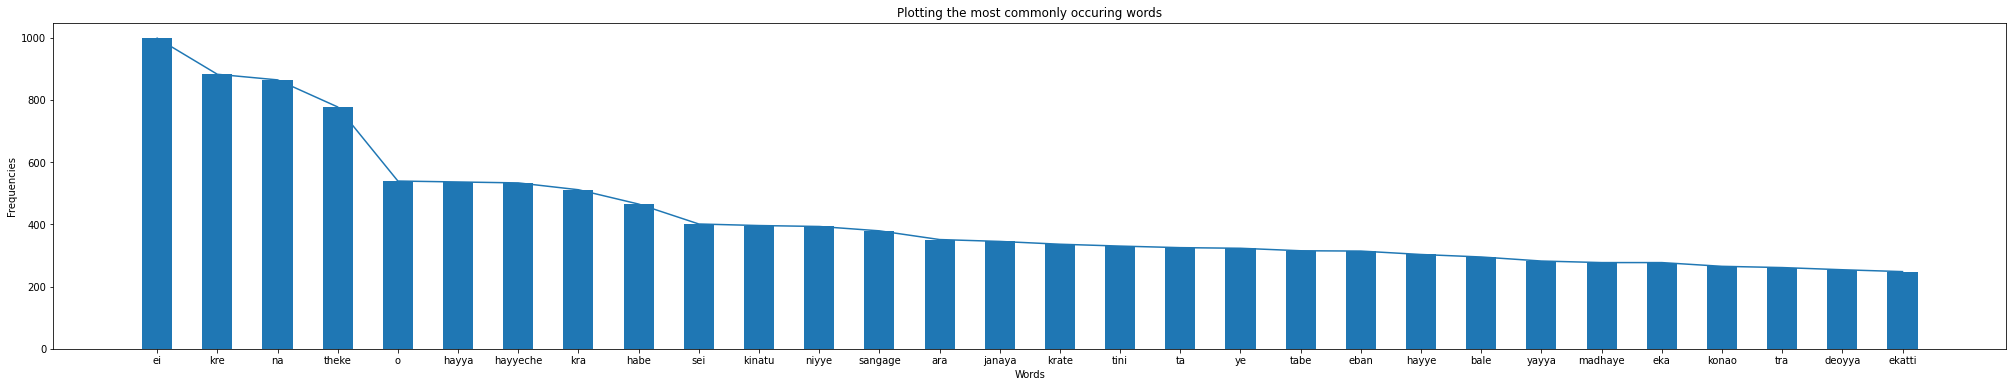

In [ ]:
from matplotlib import pyplot as plt
from bn_nlp.preprocessing import ban_processing
bp=ban_processing()

bengalicommonwords = []
bengalicommonwordfreq = []

for thing in wordcountbeng.most_common(30):
  bengalicommonwords.append(bp.bn2enCon(thing[0]))
  bengalicommonwordfreq.append(thing[1])

fig = plt.figure(figsize=(35,6))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring words")
plt.bar(bengalicommonwords, bengalicommonwordfreq, width=0.5)
plt.plot(bengalicommonwords,bengalicommonwordfreq)
plt.show()

#Sentence Tokenization

In [ ]:
from re import sub, split, M

with open('/content/bengaliCorpus.txt', 'r') as f:
    lines = f.readlines()

bengsent = []
bengcleansent = []

for line in lines:
  bengsent.append(line)
  line = sub(r'[\.\,\(\)\-\тАФ\тАЭ\тАЬ\:\?\n\тАж\ред\_\тАУ\#\┬┐\?\┬б\├н\!\\\/\├б\[\]\;\'\тАШ]', ' ', line)
  bengcleansent.append(line)

#Removing Stopwords

In [ ]:
from bn_nlp.preprocessing import ban_processing
from bn_nlp.tokenizer import wordTokenizer

bp=ban_processing()
wordtoken=wordTokenizer()

nostopbeng = []

for line in bengcleansent:
  wordy = bp.stop_word_remove(line)
  tokens = wordtoken.basic_tokenizer(wordy)
  for word in tokens:
    nostopbeng.append(word)

### Printing frequency of words without the stop words 

In [ ]:
from collections import Counter

wordcountbeng = Counter(nostopbeng)
print(wordcountbeng.most_common(30))

[('ржПржХ', 277), ('рж╕ржВржмрж╛ржж', 233), ('ржкрзНрж░рждрж┐ржжрж┐ржи', 230), ('ржбрж┐ржЬрж┐ржЯрж╛рж▓', 226), ('рж╢рзБрж░рзБ', 224), ('ржХржерж╛', 222), ('ржбрзЗрж╕рзНржХ', 213), ('ржЧржд', 206), ('ржмрзЗрж╢рж┐', 190), ('ржирждрзБржи', 180), ('рж╕ржорзЯ', 170), ('ржХрж░рзЛржирж╛', 166), ('рж╣рж╛ржЬрж╛рж░', 163), ('рждрзИрж░рж┐', 162), ('ржХрж╛ржЬ', 161), ('ржжрзЗрж╢рзЗ', 152), ('ржжрж╛ржмрж┐', 152), ('ржЯрж╛ржХрж╛', 143), ('ржЕржнрж┐ржпрзЛржЧ', 138), ('ржоржирзЗ', 135), ('ржмржЫрж░', 130), ('ржнрж╛рж▓', 128), ('ржмрж┐рж░рзБржжрзНржзрзЗ', 127), ('ржПржХржЯрж╛', 126), ('ржЦржмрж░', 117), ('ржжрзЗрж╢рзЗрж░', 112), ('рж╢рзЗрж╖', 111), ('ржЬрж╛ржирж┐рзЯрзЗржЫрзЗржи', 111), ('ржжрзБржЗ', 111), ('рж▓ржХрзНрж╖', 111)]


### Plotting the most frequent words without the stop words 

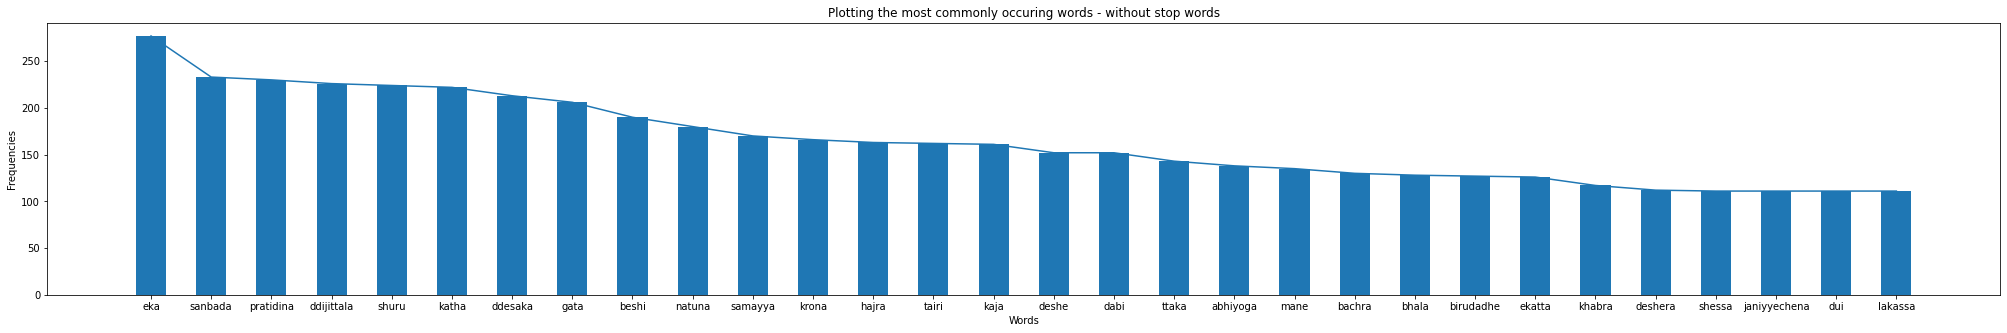

In [ ]:
from matplotlib import pyplot as plt
from bn_nlp.preprocessing import ban_processing
bp=ban_processing()

bengalicommonwords = []
bengalicommonwordfreq = []

for thing in wordcountbeng.most_common(30):
  bengalicommonwords.append(bp.bn2enCon(thing[0]))
  bengalicommonwordfreq.append(thing[1])

fig = plt.figure(figsize=(35,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring words - without stop words")
plt.bar(bengalicommonwords, bengalicommonwordfreq, width=0.5)
plt.plot(bengalicommonwords,bengalicommonwordfreq)
plt.show()

#POS Tagging

In [ ]:
from bnlp import POS
bn_pos = POS()

model_path = "/content/bn_pos.pkl"

bengalitagged = []

for text in bengcleansent: #this one has stopwords 
  res = bn_pos.tag(model_path, text)

  for thing in res:
    print(thing)
    bengalitagged.append(thing)

Streaming output truncated to the last 5000 lines.
('ржПржХ', 'JQ')
('рж░рзЛржмржЯ', 'NC')
('рждрзИрж░рж┐', 'NC')
('ржХрж░рж╛', 'NV')
('рж╣рзЯрзЗржЫрзЗ', 'VM')
('ржпрж╛', 'PRL')
('ржорж╛ржирзБрж╖рзЗрж░', 'NC')
('рж╢рзЗрж╖ржХрзГрждрзНржпрзЗрж░', 'NC')
('ржЕржирзБрж╖рзНржарж╛ржи', 'NC')
('рж╕ржорзНржкржирзНржи', 'NC')
('ржХрж░ржмрзЗ', 'VM')
('рж╣рж╛ржХрзНржХрж╛ржирж┐', 'NC')
('ржирзЗржЯржУрзЯрж╛рж░рзНржХ', 'NC')
('ржЧрзБржБрзЬрж┐рзЯрзЗ', 'VM')
('ржжрж┐рждрзЗ', 'VAUX')
('ржкрж╛ржХрж┐рж╕рзНрждрж╛ржирзЗ', 'NP')
('ржорж╛рж░рзНржХрж┐ржи', 'NP')
('ржбрзНрж░рзЛржи', 'NP')
('рж╣рж╛ржорж▓рж╛', 'NP')
('ржорж╛ржирзБрж╖рзЗрж░', 'NC')
('рж╕ржЩрзНржЧрзА', 'NC')
('рж░рзЛржмржЯ', 'NC')
('ржмрж╣рзБржХрж╛рж▓', 'NC')
('ржЖржЧрзЗ', 'NST')
('ржерзЗржХрзЗржЗ', 'PP')
('рж╣рзЯрзЗржЫрзЗ', 'VM')
('ржЕржирзЗржХрзЗржЗ', 'PPR')
('ржЕржлрж┐рж╕', 'NC')
('ржмрж╛ржбрж╝рж┐рж░', 'NC')
('ржХрж╛ржЬрзЗрж░', 'NC')
('ржЬржирзНржп', 'PP')
('рж╣рж┐ржЙржорзНржпрж╛ржирзЯрзЗржб', 'NC')
('рж░рзЛржмржЯ', 'NC')
('ржмрзНржпржмрж╣рж╛рж░

### Finding the frequency of each POS tag

In [ ]:
tags = []

for thing in bengalitagged:
  tags.append(thing[1])

tagcountbeng = Counter(tags)

print(tagcountbeng)

Counter({'NC': 46189, 'VM': 13565, 'JJ': 7311, 'NP': 4938, 'PPR': 4108, 'JQ': 3975, 'NV': 2994, 'PP': 2985, 'VAUX': 2469, 'DAB': 2033, 'CSB': 1896, 'RDF': 1667, 'NST': 1623, 'ALC': 1609, 'CCD': 1474, 'CX': 1315, 'AMN': 920, 'PU': 863, 'LC': 604, 'PRL': 440, 'CCL': 332, 'PWH': 311, 'PRF': 196, 'DRL': 185, 'RDX': 14, 'CIN': 13, 'LV': 2, 'RDS': 1})


### Plotting the 30 most common tags 

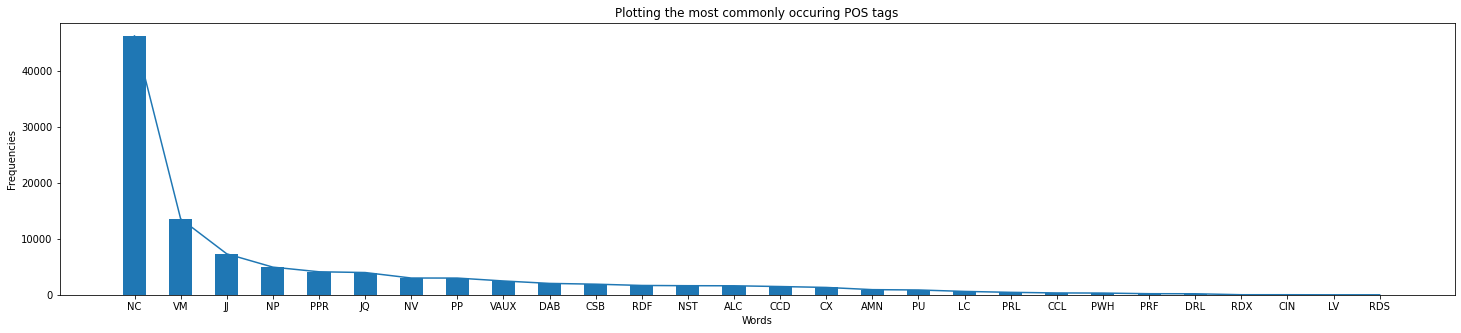

In [ ]:
from nltk.probability import FreqDist
from matplotlib import pyplot as plt

tags = []
freqs = []

for thing in tagcountbeng.most_common(30):
  tags.append(thing[0])
  freqs.append(thing[1])

fig = plt.figure(figsize=(25,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring POS tags")
plt.bar(tags, freqs, width=0.5)
plt.plot(tags, freqs)
plt.show()

## Data without stopwords 

In [ ]:
from bnlp import POS
bn_pos = POS()

model_path = "/content/bn_pos.pkl"

bengalitagged1 = []

res = bn_pos.tag(model_path, nostopbeng)

for thing in res:
  print(thing)
  bengalitagged1.append(thing)

Streaming output truncated to the last 5000 lines.
('рж╣рж╛ржЯ', 'NC')
('ржЪрж╛рж▓рзБ', 'NC')
('ржмрж┐рж╖рзЯржЯрж┐', 'NC')
('ржжрзАрж░рзНржШржжрж┐ржи', 'NC')
('ржкрзНрж░рж╕рзНрждрж╛ржмржЯрж┐', 'NC')
('ржЕржирж┐рж╢рзНржЪрж┐ржд', 'JJ')
('ржжрзАрж░рзНржШржжрж┐ржи', 'NC')
('ржмрж╛рж╕рзНрждржмрж╛рзЯрж┐ржд', 'JJ')
('ржЙржкржХрзГржд', 'JJ')
('ржнрж╛рж░ржд', 'NP')
('ржмрж╛ржВрж▓рж╛ржжрзЗрж╢рзЗрж░', 'NP')
('рж╕рзАржорж╛ржирзНрждржмрж░рзНрждрзА', 'NP')
('ржмрж╛рж╕рж┐ржирзНржжрж╛рж░рж╛', 'NC')
('ржХрж┐ржЫрзБржЯрж╛', 'JQ')
('ржЪрзЛрж░рж╛ржЪрж╛рж▓рж╛ржирзЗ', 'NC')
('рж░рж╛рж╢', 'NC')
('ржкрзЬржмрзЗ', 'VM')
('ржПржоржиржЯрж╛ржЗ', 'PPR')
('ржЖрж╢рж╛ржмрж╛ржжрзА', 'JJ')
('рж╕ржВрж╢рзНрж▓рж┐рж╖рзНржЯ', 'JJ')
('ржорж╣рж▓', 'NC')
('ржЕржмрж╢рзЗрж╖рзЗ', 'ALC')
('ржкрж╢рзНржЪрж┐ржоржмржЩрзНржЧрзЗрж░', 'NP')
('ржорж╛рж▓ржжрж╣', 'NP')
('ржмрж╛ржВрж▓рж╛ржжрзЗрж╢рзЗрж░', 'NP')
('рж░рж╛ржЬрж╢рж╛рж╣рзА', 'NP')
('ржЬрзЗрж▓рж╛рж░', 'NC')
('ржЬрж┐рж░рзЛ', 'NC')
('ржкрзЯрзЗржирзНржЯрзЗ', 'NC')
('ржЪрж╛рж▓рзБ', 'NC')

### Finding the frequency of each POS tag

In [ ]:
tags = []

for thing in bengalitagged1:
  tags.append(thing[1])

tagcountbeng = Counter(tags)

print(tagcountbeng)

Counter({'NC': 46209, 'JJ': 7326, 'VM': 5834, 'NP': 5007, 'JQ': 2276, 'RDF': 1669, 'NV': 946, 'VAUX': 808, 'PPR': 709, 'ALC': 618, 'AMN': 588, 'NST': 518, 'LC': 386, 'PP': 384, 'CCL': 155, 'CX': 98, 'DAB': 95, 'PRL': 83, 'CSB': 65, 'PRF': 31, 'PWH': 16, 'RDX': 14, 'DRL': 8, 'PU': 3, 'LV': 2})


### Plotting the 30 most common tags 

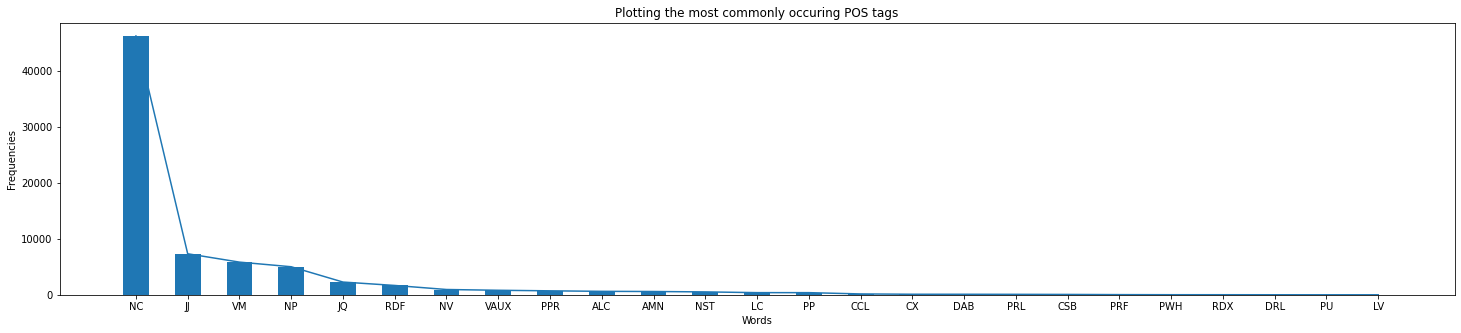

In [ ]:
from nltk.probability import FreqDist
from matplotlib import pyplot as plt

tags = []
freqs = []

for thing in tagcountbeng.most_common(30):
  tags.append(thing[0])
  freqs.append(thing[1])

fig = plt.figure(figsize=(25,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring POS tags")
plt.bar(tags, freqs, width=0.5)
plt.plot(tags, freqs)
plt.show()

#Stemming

In [ ]:
from bn_nlp.Stemmer import stemmerOP

stemlist = []

stemmer=stemmerOP()
for word in nostopbeng:
  print(word, "->", stemmer.stem(word))
  stemlist.append(stemmer.stem(word))

### Finding the most common word stems

In [ ]:
from collections import Counter

stemcounteng = Counter(stemlist)
print(stemcounteng.most_common(30))

[('ржжрзЗрж╢', 344), ('ржПржХ', 304), ('ржХржерж╛', 302), ('рж░рж╛ржЬрзНржп', 256), ('рж╢рзБрж░рзБ', 254), ('ржмрж▓', 237), ('ржХрж░рзЛржи', 235), ('ржкрзНрж░рждрж┐ржжрж┐ржи', 234), ('рж╕ржВржмрж╛ржж', 233), ('ржбрж┐ржЬрж┐ржЯрж╛рж▓', 227), ('ржЧржд', 214), ('ржбрзЗрж╕рзНржХ', 213), ('ржХрж╛ржЬ', 213), ('ржоржи', 200), ('рж╕ржо', 192), ('ржмрзЗрж╢', 190), ('ржЯрж╛ржХ', 187), ('ржкржбрж╝', 184), ('ржирждрзБржи', 180), ('ржирж╛ржо', 177), ('ржжрж┐ржи', 174), ('рж╣рж╛ржЬ', 166), ('ржжрж╛ржмрж┐', 164), ('ржкрзБрж▓рж┐рж╢', 163), ('ржмрж╛ржбрж╝рж┐', 162), ('рждрзИрж░', 162), ('ржЕржнрж┐ржпрзЛржЧ', 158), ('ржЖрж╕', 156), ('ржЪрж▓', 155), ('рж╢рзЗрж╖', 152)]


### Plotting the most common stems

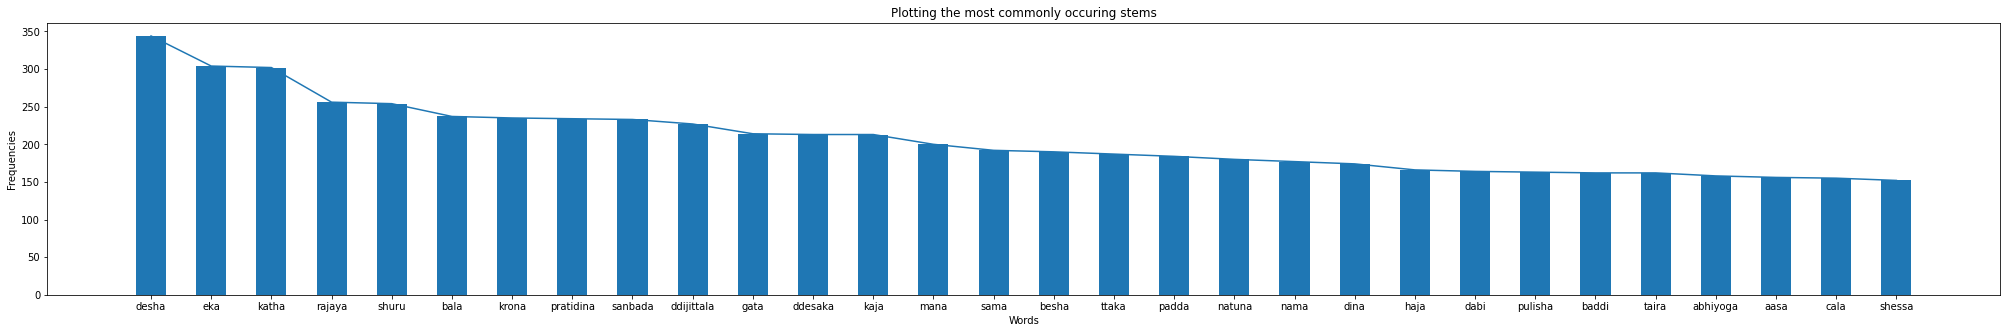

In [ ]:
from matplotlib import pyplot as plt
from bn_nlp.preprocessing import ban_processing
bp=ban_processing()

commonstems = []
commonstemfreq = []

for thing in stemcounteng.most_common(30):
  commonstems.append(bp.bn2enCon(thing[0]))
  commonstemfreq.append(thing[1])

fig = plt.figure(figsize=(35,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring stems")
plt.bar(commonstems, commonstemfreq, width=0.5)
plt.plot(commonstems,commonstemfreq)
plt.show()

#Lemmatization

In [ ]:
from banglakit import lemmatizer as lem
from banglakit.lemmatizer import BengaliLemmatizer

lemmatizer = BengaliLemmatizer()
lemmed = []

for word in nostopbeng:
  print(word,"->",lemmatizer.lemmatize(word))
  lemmed.append(lemmatizer.lemmatize(word))

Streaming output truncated to the last 5000 lines.
рж╣рж╛ржЯ -> рж╣рж╛ржЯ
ржЪрж╛рж▓рзБ -> ржЪрж╛рж▓рзБ
ржмрж┐рж╖рзЯржЯрж┐ -> ржмрж┐рж╖рзЯржЯрж┐
ржжрзАрж░рзНржШржжрж┐ржи -> ржжрзАрж░рзНржШржжрж┐ржи
ржкрзНрж░рж╕рзНрждрж╛ржмржЯрж┐ -> ржкрзНрж░рж╕рзНрждрж╛ржмржЯрж┐
ржЕржирж┐рж╢рзНржЪрж┐ржд -> ржЕржирж┐рж╢рзНржЪрж┐ржд
ржжрзАрж░рзНржШржжрж┐ржи -> ржжрзАрж░рзНржШржжрж┐ржи
ржмрж╛рж╕рзНрждржмрж╛рзЯрж┐ржд -> ржмрж╛рж╕рзНрждржмрж╛рзЯрж┐ржд
ржЙржкржХрзГржд -> ржЙржкржХрзГржд
ржнрж╛рж░ржд -> ржнрж╛рж░ржд
ржмрж╛ржВрж▓рж╛ржжрзЗрж╢рзЗрж░ -> ржмрж╛ржВрж▓рж╛ржжрзЗрж╢рзЗрж░
рж╕рзАржорж╛ржирзНрждржмрж░рзНрждрзА -> рж╕рзАржорж╛ржирзНрждржмрж░рзНрждрзА
ржмрж╛рж╕рж┐ржирзНржжрж╛рж░рж╛ -> ржмрж╛рж╕рж┐ржирзНржжрж╛рж░рж╛
ржХрж┐ржЫрзБржЯрж╛ -> ржХрж┐ржЫрзБржЯрж╛
ржЪрзЛрж░рж╛ржЪрж╛рж▓рж╛ржирзЗ -> ржЪрзЛрж░рж╛ржЪрж╛рж▓рж╛ржирзЗ
рж░рж╛рж╢ -> рж░рж╛рж╢
ржкрзЬржмрзЗ -> ржкрзЬ
ржПржоржиржЯрж╛ржЗ -> ржПржоржиржЯрж╛ржЗ
ржЖрж╢рж╛ржмрж╛ржжрзА -> ржЖрж╢рж╛ржмрж╛ржжрзА
рж╕ржВрж╢рзНрж▓рж┐рж╖рзНржЯ -> рж╕ржВрж╢рзНрж▓рж┐рж╖рзНр

# Word Cloud Algorithm
---
Algorithm or Logic I have thought of for generating the word cloud:
- Having looked at the frequency graphs, I have reached the conclusion that for the word cloud I will be using a pretty simple logic or algorithm 
- I want to use the most commonly occuring words for the word cloud, however the catch is that I want to ensure it doesn't include stopwords or any word with apostrophe while also ensuring that they are mostly either common nouns, proper nouns or verbs 

### More information about the word cloud
---
#### The reason I just want to include the frequency as my importance factor:
- I feel like if I remove the stopwords or words with apostrophe marks and stopwords, the remaining words give a pretty comprehensive view of the main terms that help define the corpus I have selected
- Another thing I want to ensure is that the word included in the word cloud doesn't include words like also, like, etc and thus mainly focus on words which are either nouns or verbs or adjectives mostly
---
#### The reason I picked the 50 most frequent words:
- With the given data, I think the top 50 words would give a pretty comprehensive word cloud of the data without going into terms which are too niche to appear on it 
- A word cloud is sort of meant to give a brief overview of the kind of data we have and I feel like 50 words is a good place to keep it at to ensure that the data is well represented and not made too niche at the same time
- The top 50 words are also going to appear after the code block written below


### Making the required list

In [ ]:
from collections import Counter
from bn_nlp.posTag import postag

tagger=postag()
wordcountbeng = Counter(nostopbeng)

pos = []

length = len(wordcountbeng)

for thing in wordcountbeng.most_common(2000):
  possy = tagger.tag(thing[0])
  for possed in possy:
    pos.append(possed[1])

bengcommonwords = []
bengcommonwordfreq = []

index = 0
i = 0

for thing in wordcountbeng.most_common(2000):
  if 'noun' == pos[index]:
    bengcommonwords.append(thing[0])
    bengcommonwordfreq.append(thing[1] * 5)
    i += 1
  elif 'adjective' in pos[index]:
    bengcommonwords.append(thing[0])
    bengcommonwordfreq.append(thing[1] * 3)
    i += 1
  elif 'adverb' in pos[index]:
    bengcommonwords.append(thing[0])
    bengcommonwordfreq.append(thing[1] * 2)
    i += 1
  if 'verb' == pos[index]:
    bengcommonwords.append(thing[0])
    bengcommonwordfreq.append(thing[1] * 2.5)
    i += 1
  
  if i == 50:
    break
  index += 1

In [ ]:
n = len(bengcommonwords)

for i in range(n-1):
  for j in range(0, n-i-1):
    if bengcommonwordfreq[j] < bengcommonwordfreq[j + 1] :
            bengcommonwordfreq[j], bengcommonwordfreq[j + 1] = bengcommonwordfreq[j + 1], bengcommonwordfreq[j]
            bengcommonwords[j], bengcommonwords[j + 1] = bengcommonwords[j + 1], bengcommonwords[j]

### Plotting the data

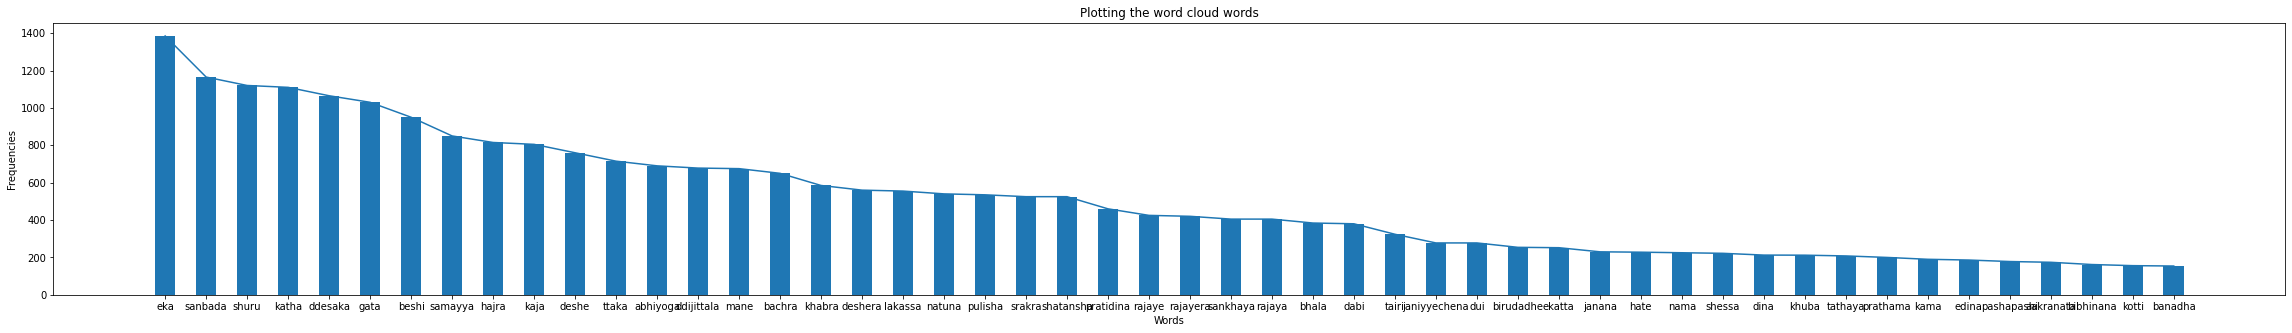

In [ ]:
from matplotlib import pyplot as plt
from bn_nlp.preprocessing import ban_processing
bp=ban_processing()

bengplot = []

for word in bengcommonwords:
  bengplot.append(bp.bn2enCon(word))

fig = plt.figure(figsize=(40,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the word cloud words")
plt.bar(bengplot, bengcommonwordfreq, width=0.5)
plt.plot(bengplot, bengcommonwordfreq)
plt.show()

### Printing the most common words that I obtained with the help of my algorithm

In [ ]:
for i in range(len(bengcommonwords)):
  print(bengcommonwords[i])

ржПржХ
рж╕ржВржмрж╛ржж
рж╢рзБрж░рзБ
ржХржерж╛
ржбрзЗрж╕рзНржХ
ржЧржд
ржмрзЗрж╢рж┐
рж╕ржорзЯ
рж╣рж╛ржЬрж╛рж░
ржХрж╛ржЬ
ржжрзЗрж╢рзЗ
ржЯрж╛ржХрж╛
ржЕржнрж┐ржпрзЛржЧ
ржбрж┐ржЬрж┐ржЯрж╛рж▓
ржоржирзЗ
ржмржЫрж░
ржЦржмрж░
ржжрзЗрж╢рзЗрж░
рж▓ржХрзНрж╖
ржирждрзБржи
ржкрзБрж▓рж┐рж╢
рж╕рж░ржХрж╛рж░
рж╢рждрж╛ржВрж╢
ржкрзНрж░рждрж┐ржжрж┐ржи
рж░рж╛ржЬрзНржпрзЗ
рж░рж╛ржЬрзНржпрзЗрж░
рж╕ржВржЦрзНржпрж╛
рж░рж╛ржЬрзНржп
ржнрж╛рж▓
ржжрж╛ржмрж┐
рждрзИрж░рж┐
ржЬрж╛ржирж┐рзЯрзЗржЫрзЗржи
ржжрзБржЗ
ржмрж┐рж░рзБржжрзНржзрзЗ
ржПржХржЯрж╛
ржЬрж╛ржирж╛ржи
рж╣рж╛рждрзЗ
ржирж╛ржо
рж╢рзЗрж╖
ржжрж┐ржи
ржЦрзБржм
рждржерзНржп
ржкрзНрж░ржержо
ржХржо
ржПржжрж┐ржи
ржкрж╛рж╢рж╛ржкрж╛рж╢рж┐
ржЖржХрзНрж░рж╛ржирзНржд
ржмрж┐ржнрж┐ржирзНржи
ржХрзЛржЯрж┐
ржмржирзНржз


#Word Cloud Visualization 

In [ ]:
from bn_nlp.preprocessing import ban_processing
bp=ban_processing()

wcdict = {}

for i in range(len(bengcommonwords)):
  wcdict[bp.bn2enCon(bengcommonwords[i])] = bengcommonwordfreq[i]

print(wcdict)

{'eka': 1385, 'sanbada': 1165, 'shuru': 1120, 'katha': 1110, 'ddesaka': 1065, 'gata': 1030, 'beshi': 950, 'samayya': 850, 'hajra': 815, 'kaja': 805, 'deshe': 760, 'ttaka': 715, 'abhiyoga': 690, 'ddijittala': 678, 'mane': 675, 'bachra': 650, 'khabra': 585, 'deshera': 560, 'lakassa': 555, 'natuna': 540, 'pulisha': 535, 'srakra': 525, 'shatansha': 525, 'pratidina': 460, 'rajaye': 425, 'rajayera': 420, 'sankhaya': 405, 'rajaya': 405, 'bhala': 384, 'dabi': 380.0, 'tairi': 324, 'janiyyechena': 277.5, 'dui': 277.5, 'birudadhe': 254, 'ekatta': 252, 'janana': 230.0, 'hate': 228, 'nama': 225.0, 'shessa': 222, 'dina': 212.5, 'khuba': 212, 'tathaya': 208, 'prathama': 200, 'kama': 190.0, 'edina': 186, 'pashapashi': 178, 'aakranata': 174, 'bibhinana': 162, 'kotti': 156, 'banadha': 154}


In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='black', width = 500, height=500, margin=2)

In [ ]:
wc.fit_words(wcdict)
wc.to_file('wc.png')

# Final Word Cloud that was generated
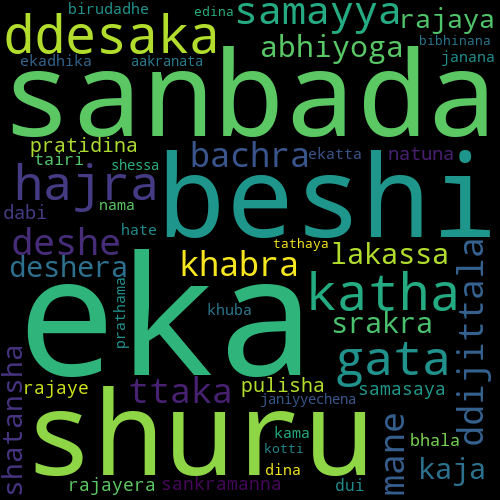

In [ ]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf

--2022-05-12 17:40:54--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: тАШkalpurush.ttf.3тАЩ

kalpurush.ttf.3     100%[===================>] 307.22K   495KB/s    in 0.6s    

2022-05-12 17:40:55 (495 KB/s) - тАШkalpurush.ttf.3тАЩ saved [314592/314592]



In [ ]:
wcdict = {}

for i in range(len(bengcommonwords)):
  wordy = bengcommonwords[i]
  wcdict[wordy] = bengcommonwordfreq[i]

print(wcdict)

{'ржПржХ': 1385, 'рж╕ржВржмрж╛ржж': 1165, 'рж╢рзБрж░рзБ': 1120, 'ржХржерж╛': 1110, 'ржбрзЗрж╕рзНржХ': 1065, 'ржЧржд': 1030, 'ржмрзЗрж╢рж┐': 950, 'рж╕ржорзЯ': 850, 'рж╣рж╛ржЬрж╛рж░': 815, 'ржХрж╛ржЬ': 805, 'ржжрзЗрж╢рзЗ': 760, 'ржЯрж╛ржХрж╛': 715, 'ржЕржнрж┐ржпрзЛржЧ': 690, 'ржбрж┐ржЬрж┐ржЯрж╛рж▓': 678, 'ржоржирзЗ': 675, 'ржмржЫрж░': 650, 'ржЦржмрж░': 585, 'ржжрзЗрж╢рзЗрж░': 560, 'рж▓ржХрзНрж╖': 555, 'ржирждрзБржи': 540, 'ржкрзБрж▓рж┐рж╢': 535, 'рж╕рж░ржХрж╛рж░': 525, 'рж╢рждрж╛ржВрж╢': 525, 'ржкрзНрж░рждрж┐ржжрж┐ржи': 460, 'рж░рж╛ржЬрзНржпрзЗ': 425, 'рж░рж╛ржЬрзНржпрзЗрж░': 420, 'рж╕ржВржЦрзНржпрж╛': 405, 'рж░рж╛ржЬрзНржп': 405, 'ржнрж╛рж▓': 384, 'ржжрж╛ржмрж┐': 380.0, 'рждрзИрж░рж┐': 324, 'ржЬрж╛ржирж┐рзЯрзЗржЫрзЗржи': 277.5, 'ржжрзБржЗ': 277.5, 'ржмрж┐рж░рзБржжрзНржзрзЗ': 254, 'ржПржХржЯрж╛': 252, 'ржЬрж╛ржирж╛ржи': 230.0, 'рж╣рж╛рждрзЗ': 228, 'ржирж╛ржо': 225.0, 'рж╢рзЗрж╖': 222, 'ржжрж┐ржи': 212.5, 'ржЦрзБржм': 212, 'рждржерзНржп': 208, 'ржкрзНрж░ржержо': 200, 'ржХржо': 190.0, 'ржП

In [ ]:
from wordcloud import WordCloud
import re

regex = r"[\u0980-\u09FF]+"
wc = WordCloud(background_color='black', width = 500, height=500, margin=2, font_path="kalpurush.ttf",regexp=regex)

In [ ]:
wc.fit_words(wcdict)
wc.to_file('wc2.png')

# Obtaining the same wordcloud in bengali
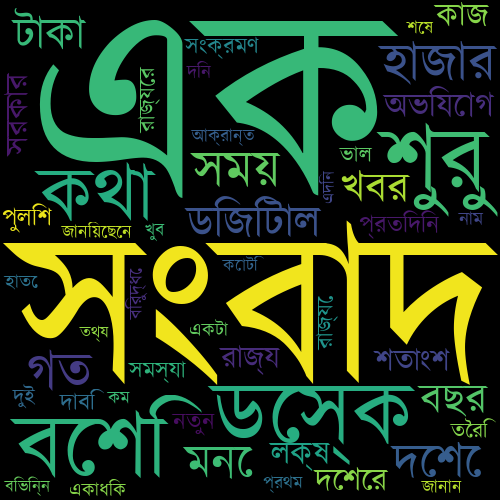